In [18]:
import os
from tensorflow.keras.models import load_model,save_model
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('../raw_data/models/cnn/cnn_face_vgg_aug_model.h5')

# Show the model architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 5, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 15360)             0         
                                                                 
 dense_14 (Dense)            (None, 500)               7680500   
                                                                 
 dense_15 (Dense)            (None, 2)                 1002      
                                                                 
Total params: 22,396,190
Trainable params: 7,681,502
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
image_list = []

for filename in glob.glob('../raw_data/data_cnn/Test/custom/*.jpg'): #assuming gif
    image = Image.open(filename)
    image = image.resize((178, 218)) #image.resize((256, 256))
    image_array = np.array(image)
    image_list.append(image_array)
    print(image_array.shape)

(218, 178, 3)
(218, 178, 3)


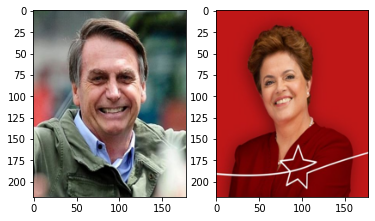

In [32]:
#plt.figure(figsize=(20,15))
for i in range(len(image_list)):
    plt.subplot(1,len(image_list),i+1)
    plt.imshow(image_list[i])

In [60]:
data_list=[]

img=cv2.imread('../raw_data/data_cnn/Test/custom/bolsonaro.jpg')
img=cv2.resize(img, (178,218)) # resize the image
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # cv2 creates bgr images, convert to rgb images
img=tf.keras.applications.vgg16.preprocess_input(img)   # apply the Vgg16 preprocess function
data_list.append(img)

data=np.array(data_list)/255 # convert to an np array and rescale images
print (data.shape)

model.predict(data )

(1, 218, 178, 3)
1/1 [==============================] - 0s 118ms/step


array([[0.69918674, 0.45859   ]], dtype=float32)

In [35]:
import cv2
import numpy as np
import os
data_list=[]
dir=r'../raw_data/data_cnn/Test/custom/bolsonaro.jpg'
test_list=os.listdir(dir) # create a list of the files in the directory
batch_size=len(test_list) # determine number of files to process
for f in test_list:  # iterate through the files
    fpath=os.path.join (dir, f) # create path to the image file
    img=cv2.imread(fpath) # read image using cv2
    img=cv2.resize(img, (178,218)) # resize the image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # cv2 creates bgr images, convert to rgb images
    img=tf.keras.applications.vgg16.preprocess_input(img)   # apply the Vgg16 preprocess function
    data_list.append(img)  # append processed image to the list
data=np.array(data_list)/255 # convert to an np array and rescale images
print (data.shape, batch_size)
predictions=model.predict(data,batch_size=batch_size, verbose=0 )
trials=len (predictions)
for i in range(0,trials):
    predicted_class=predictions[i].argmax() # get index of highest probability
    print (test_list[i], predicted_class) # print file name and class prediction

NotADirectoryError: [Errno 20] Not a directory: '../raw_data/data_cnn/Test/custom/bolsonaro.jpg'